In [6]:
!pip install yfinance statsmodels plotly scikit-learn pmdarima


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.5 MB/s eta 0:00:01
     ---------------------------------------- 949.2/949.2 kB 1.6 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   --------------------------------- ----

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


[*********************100%***********************]  1 of 1 completed


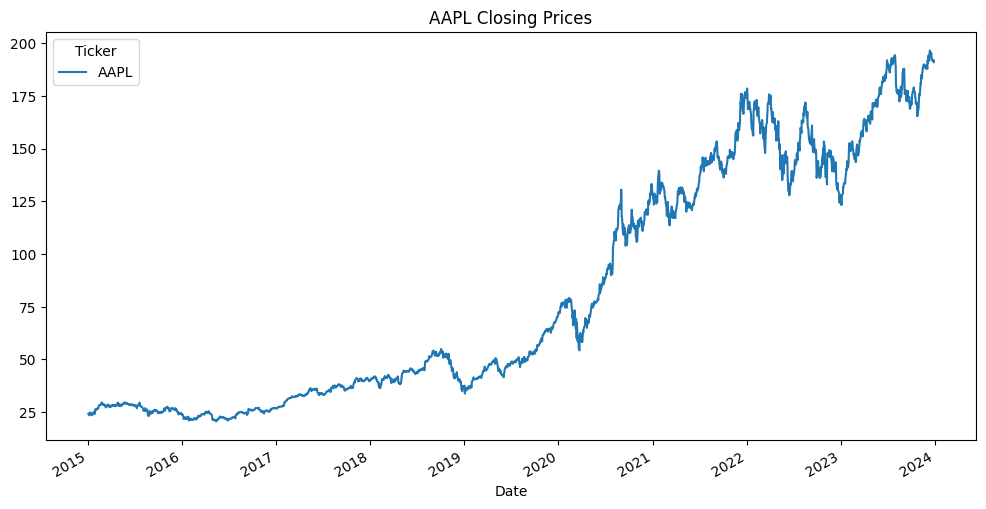

In [8]:
stock_name = "AAPL"
stock_data = yf.download(stock_name, start="2015-01-01", end="2023-12-31")

stock_data = stock_data[['Close']]
stock_data.rename(columns={'Close': stock_name}, inplace=True)

stock_data[stock_name].plot(title=f"{stock_name} Closing Prices", figsize=(12,6))
plt.show()

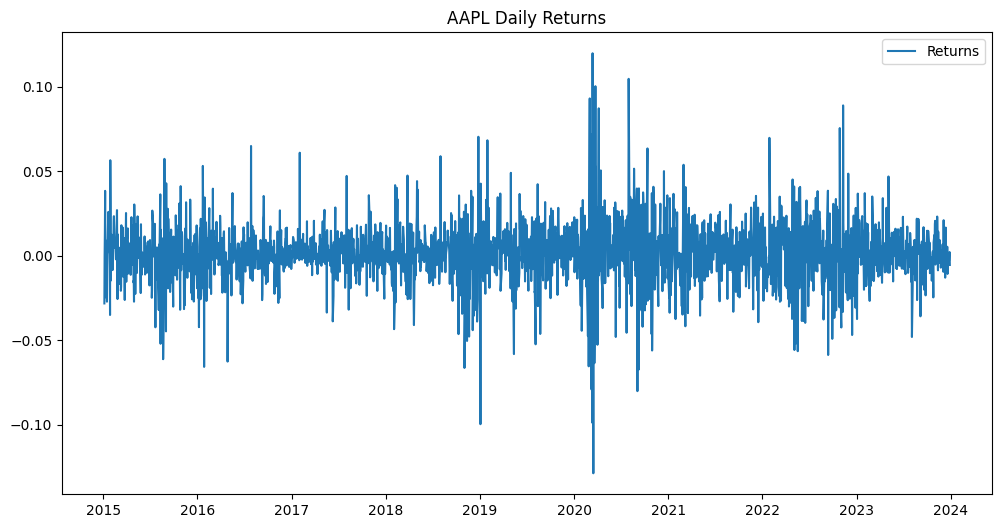

In [9]:
# Percentage returns instead of raw prices 
returns = stock_data[stock_name].pct_change().dropna()

plt.figure(figsize=(12,6))
plt.plot(returns, label="Returns")
plt.title(f"{stock_name} Daily Returns")
plt.legend()
plt.show()

In [10]:
train_size = int(len(returns) * 0.8)
train, test = returns[:train_size], returns[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 1810, Test size: 453


In [11]:
# Plot Forecast
def plot_forecast(train, test, forecast, conf_int, title="Forecast"):
    plt.figure(figsize=(12,6))
    plt.plot(train.index, train, label="Train")
    plt.plot(test.index, test, label="Test")
    plt.plot(test.index, forecast, label="Forecast")
    plt.fill_between(test.index, conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)
    plt.title(title)
    plt.legend()
    plt.show()

#Metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred):
    return np.mean(np.sign(y_true) == np.sign(y_pred))

def print_metrics(y_true, y_pred, title="Results"):
    print(f"\n== {title} ==")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {rmse(y_true, y_pred):.4f}")
    print(f"MAPE: {mape(y_true, y_pred):.2f}%")
    print(f"Directional Accuracy: {directional_accuracy(y_true, y_pred):.2f}")

C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

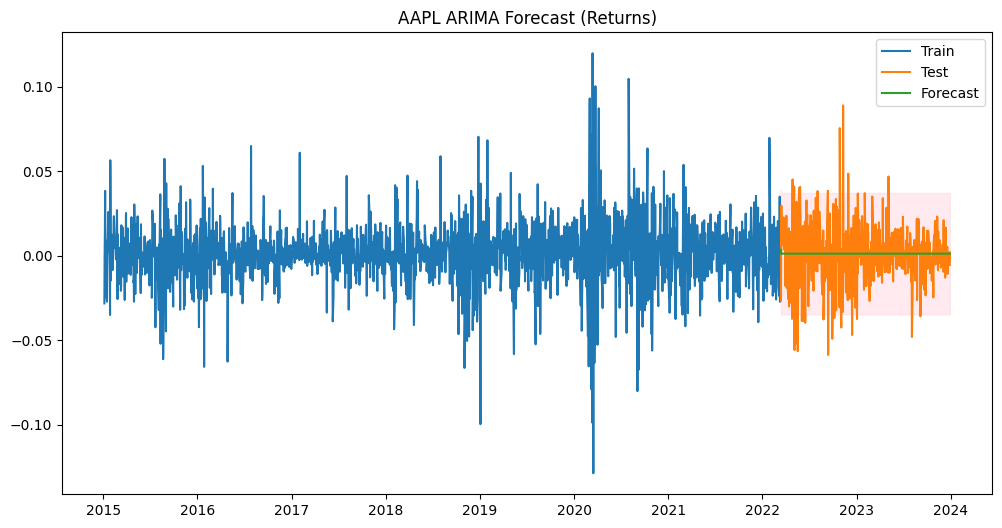


== AAPL ARIMA Results (Returns) ==
MAE : 0.0134
RMSE: 0.0182
MAPE: inf%
Directional Accuracy: 0.53


In [12]:
# ARIMA Model
arima_model = ARIMA(train, order=(1,1,1))
arima_res = arima_model.fit()

# Forecast
forecast_res = arima_res.get_forecast(steps=len(test))
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# Plot
plot_forecast(train, test, forecast, conf_int.values, title=f"{stock_name} ARIMA Forecast (Returns)")

# Evaluate
print_metrics(test.values, forecast.values, f"{stock_name} ARIMA Results (Returns)")

C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

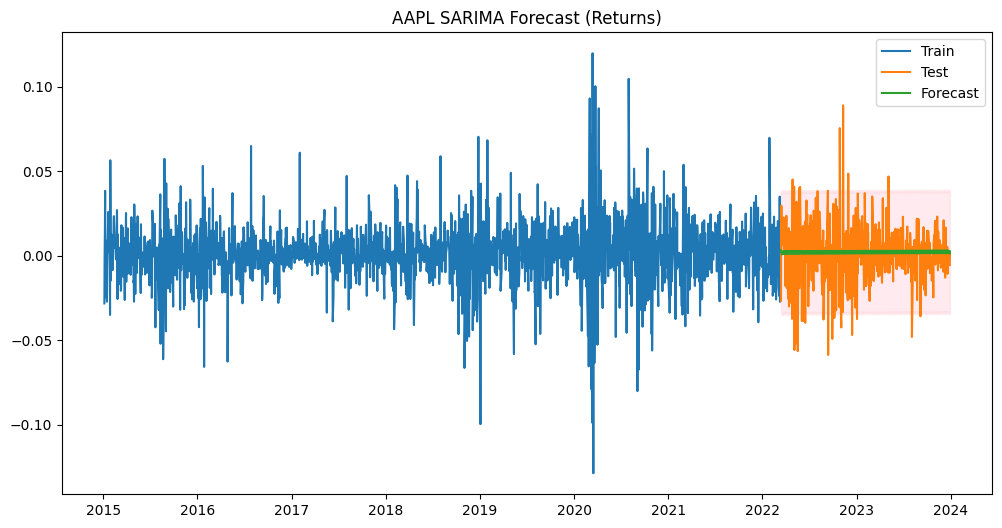


== AAPL SARIMA Results (Returns) ==
MAE : 0.0135
RMSE: 0.0183
MAPE: inf%
Directional Accuracy: 0.53


In [13]:
# SARIMA Model
sarima_model = SARIMAX(train,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,5),  # 5-day weekly seasonality
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_res = sarima_model.fit(disp=False)

# Forecast
forecast_res = sarima_res.get_forecast(steps=len(test))
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# Plot
plot_forecast(train, test, forecast, conf_int.values, title=f"{stock_name} SARIMA Forecast (Returns)")

# Evaluate
print_metrics(test.values, forecast.values, f"{stock_name} SARIMA Results (Returns)")

In [15]:
def rolling_cv(series, order=(1,1,1), seasonal_order=(1,1,1,5), folds=5):
    size = len(series)
    fold_size = size // folds
    maes, rmses, mapes, dirs = [], [], [], []
    
    for i in range(folds):
        train_end = fold_size * (i+1)
        train, test = series[:train_end], series[train_end:train_end+fold_size]
        
        if len(test) == 0:
            continue
        
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        res = model.fit(disp=False)
        
        forecast = res.get_forecast(steps=len(test)).predicted_mean
        
        # ✅ Align forecast with test index
        forecast = pd.Series(forecast.values, index=test.index)
        
        maes.append(mean_absolute_error(test.values, forecast.values))
        rmses.append(np.sqrt(mean_squared_error(test.values, forecast.values)))
        mapes.append(mape(test.values, forecast.values))
        dirs.append(directional_accuracy(test.values, forecast.values))
    
    return {
        "MAE": np.mean(maes),
        "RMSE": np.mean(rmses),
        "MAPE": np.mean(mapes),
        "Directional Accuracy": np.mean(dirs)
    }

cv_results = rolling_cv(returns, order=(1,1,1), seasonal_order=(1,1,1,5))
print("\n== Cross-Validated SARIMA Results ==")
for k,v in cv_results.items():
    print(f"{k}: {v:.4f}")


C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 


== Cross-Validated SARIMA Results ==
MAE: 0.0110
RMSE: 0.0154
MAPE: inf
Directional Accuracy: 0.5607


C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mimadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_returns = scaler.fit_transform(returns.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 10
X, y = create_sequences(scaled_returns, seq_len)

# Train/test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_len, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Forecast
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0238
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0224
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo


== LSTM Results ==
MAE : 0.0134
RMSE: 0.0182
MAPE: inf%
Directional Accuracy: 0.52


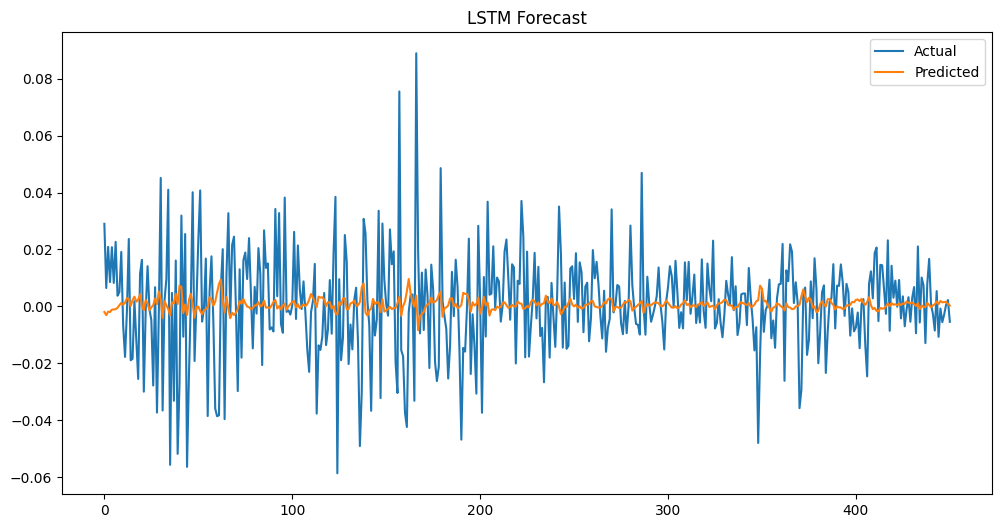

In [18]:
# Evaluate
print("\n== LSTM Results ==")
print(f"MAE : {mean_absolute_error(y_test_rescaled, y_pred_rescaled):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)):.4f}")
print(f"MAPE: {mape(y_test_rescaled.flatten(), y_pred_rescaled.flatten()):.2f}%")
print(f"Directional Accuracy: {directional_accuracy(y_test_rescaled.flatten(), y_pred_rescaled.flatten()):.2f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title("LSTM Forecast")
plt.legend()
plt.show()

In [23]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prophet expects columns: 'ds' (date), 'y' (value)
prophet_df = pd.DataFrame({
    "ds": returns.index,
    "y": returns.values.flatten()
})

# Train-test split (80/20)
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

# Fit Prophet model
m = Prophet(daily_seasonality=True)
m.fit(train_df)

# Make predictions only for test set dates
future = pd.DataFrame({"ds": test_df["ds"]})
forecast = m.predict(future)

# Align predictions with test set
forecast_series = forecast.set_index("ds").loc[test_df["ds"], "yhat"]

# Evaluation metrics
y_true = test_df["y"].values
y_pred = forecast_series.values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
directional_accuracy = np.mean(np.sign(y_true[1:] - y_true[:-1]) == 
                               np.sign(y_pred[1:] - y_pred[:-1]))

print("\n== Prophet Results (Returns) ==")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Directional Accuracy: {directional_accuracy:.2f}")


20:51:23 - cmdstanpy - INFO - Chain [1] start processing
20:51:24 - cmdstanpy - INFO - Chain [1] done processing



== Prophet Results (Returns) ==
MAE : 0.0136
RMSE: 0.0184
MAPE: inf%
Directional Accuracy: 0.49
